# 自动微分

假设我们想对函数$y=2\mathbf{x}^{\top}\mathbf{x}$关于列向量$\mathbf{x}$求导

In [1]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

在我们计算$y$关于$\mathbf{x}$的梯度之前，需要一个地方来存储梯度

In [2]:
x.requires_grad_(True)

tensor([0., 1., 2., 3.], requires_grad=True)

In [3]:
x.grad

现在计算$y$

In [10]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

通过调用反向传播函数来自动计算`y`关于`x`每个分量的梯度

In [11]:
y.backward()
y

tensor(28., grad_fn=<MulBackward0>)

In [12]:
x.grad

tensor([ 0., 12., 24., 36.])

In [5]:
x.grad == 4 * x

tensor([True, True, True, True])

现在计算`x`的另一个函数

In [13]:
x.grad.zero_()
x.grad

tensor([0., 0., 0., 0.])

In [14]:
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

深度学习中
，我们的目的不是计算微分矩阵，而是单独计算批量中每个样本的偏导数之和

In [15]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [21]:
x.grad.zero_()
y = x * x
y

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)

In [22]:
y.sum().backward()
y, x.grad

(tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>), tensor([0., 2., 4., 6.]))

将某些计算移动到记录的计算图之外

In [23]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [24]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

即使构建函数的计算图需要通过Python控制流（例如，条件、循环或任意函数调用），我们仍然可以计算得到的变量的梯度

In [25]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

a.grad == d / a

tensor(True)

##　练习

In [26]:
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [30]:
x.grad.zero_()

tensor([0., 0., 0., 0.])

In [38]:
y = x ** x
y

tensor([ 1.,  1.,  4., 27.], grad_fn=<PowBackward1>)

In [39]:
y.sum().backward()

In [41]:
y.sum()

tensor(33., grad_fn=<SumBackward0>)

In [44]:
x.grad

tensor([ 0.0000,  1.0000,  6.7726, 56.6625])

In [48]:
a = torch.randn(2, requires_grad=True); a

tensor([-0.0297, -0.6704], requires_grad=True)

In [51]:
d = f(a); d

tensor([  -6080.4990, -137307.8438], grad_fn=<MulBackward0>)

In [53]:
d.sum().backward()

In [54]:
a.grad

tensor([204800., 204800.])

In [55]:
d / a

tensor([204800.0000, 204799.9844], grad_fn=<DivBackward0>)

In [69]:
a = torch.randn(2, requires_grad=True)
d = f(a)
d.sum().backward()
a.grad == d / a

tensor([ True, False])

In [68]:
a = torch.randn(2, requires_grad=True)
d = f(a)
d.sum().backward()
a.grad == d / a

tensor([True, True])

In [70]:
a = torch.randn((3,2), requires_grad=True)
d = f(a)
d.sum().backward()
a.grad == d / a

tensor([[True, True],
        [True, True],
        [True, True]])

In [11]:
def f(x):
    return torch.sin(x)

In [34]:
x = torch.arange(0,10,0.1)

In [35]:
x.requires_grad_(True)

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000,
        1.8000, 1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000,
        2.7000, 2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000,
        3.6000, 3.7000, 3.8000, 3.9000, 4.0000, 4.1000, 4.2000, 4.3000, 4.4000,
        4.5000, 4.6000, 4.7000, 4.8000, 4.9000, 5.0000, 5.1000, 5.2000, 5.3000,
        5.4000, 5.5000, 5.6000, 5.7000, 5.8000, 5.9000, 6.0000, 6.1000, 6.2000,
        6.3000, 6.4000, 6.5000, 6.6000, 6.7000, 6.8000, 6.9000, 7.0000, 7.1000,
        7.2000, 7.3000, 7.4000, 7.5000, 7.6000, 7.7000, 7.8000, 7.9000, 8.0000,
        8.1000, 8.2000, 8.3000, 8.4000, 8.5000, 8.6000, 8.7000, 8.8000, 8.9000,
        9.0000, 9.1000, 9.2000, 9.3000, 9.4000, 9.5000, 9.6000, 9.7000, 9.8000,
        9.9000], requires_grad=True)

In [36]:
x1 = x.detach()

In [37]:
y = f(x)

In [38]:
y.sum().backward()

In [39]:
from d2l.torch import plot

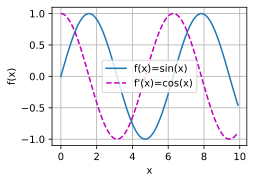

In [51]:
plot(x1, [f(x1), x.grad], 'x', 'f(x)', legend=['f(x)=sin(x)', 'f\'(x)=cos(x)'])